Columns: Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


Device set to use cuda:0


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target sentiment_label  sentiment_score  
0       1        NEGATIVE         0.726391  
1       1        NEGATIVE         0.984948  
2       1        NEGATIVE         0.979095  
3       1        NEGATIVE         0.984415  
4       1        NEGATIVE         0.973235  

Sentiment Counts:
 sentiment_label
NEGATIVE    6396
POSITIVE    1217
Name: count, dtype: int64


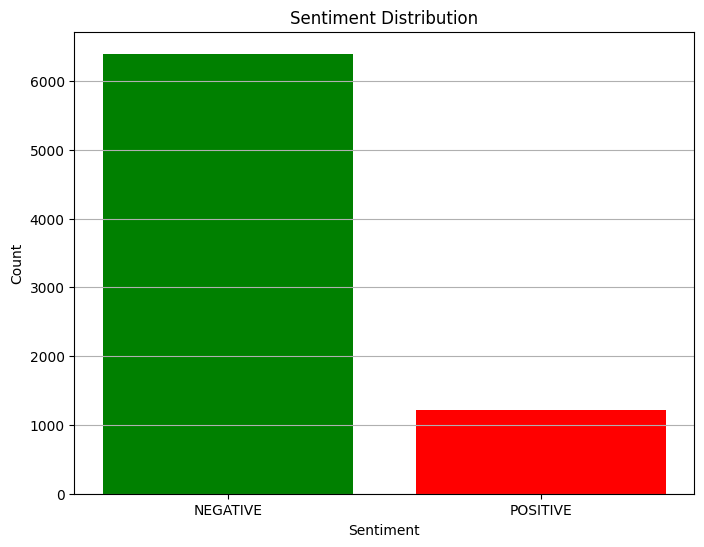


Top 5 Positive Texts:
                                                    text  sentiment_score
6673                          This thunder is beautiful         0.999886
23                                What a wonderful day!         0.999881
17                                     Summer is lovely         0.999879
5851  well done me! everyone applaud me and how terr...         0.999869
132   Aftershock back to school kick off was great. ...         0.999854

Top 5 Negative Texts:
                                                    text  sentiment_score
2036  @morehouse64 It appears our #Govt has lost an ...         0.999816
2232  hough_jeff: Crap. The Content Marketing Deluge...         0.999815
2631  @BlossomingLilac so destruction it seems. I se...         0.999810
1797  @DestinyTheGame @Bungie @PlayStation Getting k...         0.999808
2247  Also in a matter of weeks Amazon's going to be...         0.999805


In [8]:
# ----------------------------
# Hugging Face Sentiment Analysis - Colab + GPU
# ----------------------------

import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# 1️⃣ Load your dataset
file_path = "/content/drive/MyDrive/train.csv"
df = pd.read_csv(file_path)

# Check columns and first rows
print("Columns:", df.columns)
print(df.head())

# Drop missing texts
df.dropna(subset=['text'], inplace=True)  # <-- use 'text', not 'reviewText'

# 2️⃣ Load pre-trained sentiment analysis model with GPU if available
device = 0  # 0 = GPU, -1 = CPU
sentiment_analysis = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=device
)

# 3️⃣ Perform sentiment analysis in batches
batch_size = 32
all_results = []

texts = df['text'].tolist()  # <-- use 'text'
for i in range(0, len(texts), batch_size):
    batch = texts[i:i+batch_size]
    results = sentiment_analysis(batch)
    all_results.extend(results)

# 4️⃣ Add sentiment results back to DataFrame
df['sentiment_label'] = [res['label'] for res in all_results]
df['sentiment_score'] = [res['score'] for res in all_results]

# 5️⃣ Display first few rows
print(df.head())

# 6️⃣ Count sentiments
sentiment_counts = df['sentiment_label'].value_counts()
print("\nSentiment Counts:\n", sentiment_counts)

# 7️⃣ Visualize sentiment distribution
plt.figure(figsize=(8,6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

# 8️⃣ Optional: Show top positive & negative texts
top_positive = df[df['sentiment_label'] == 'POSITIVE'].sort_values('sentiment_score', ascending=False).head(5)
top_negative = df[df['sentiment_label'] == 'NEGATIVE'].sort_values('sentiment_score', ascending=False).head(5)

print("\nTop 5 Positive Texts:\n", top_positive[['text', 'sentiment_score']])
print("\nTop 5 Negative Texts:\n", top_negative[['text', 'sentiment_score']])
